# Assignment 2

### MACS 30000
### Li Liu

Due Wednesday, Oct. 17 at 11:30 AM

### 1. Imputing age and gender

#### (a) Propose a strategy for imputing age (age) and gender (female) variables into the BestIncome.txt data by using information from the SurveyIncome.txt data. Describe your proposed method, including equations.

We want to replace the missing values for _`age`_ and _`gender`_ in _`BestIncome`_ with substituted values. As _`BestIncome`_ and _`SurveyIncome`_ have common variables of _`totinc`_ (sum of `lab_inc` and `cap_inc` in `BestIncome`) and _`weight`_, we could predict the missing values using the regression models trained by _`SurveyIncome`_ data.

Linear regression for _`age`_:
\begin{equation}
Age_i = \alpha_0 + \alpha_1 totinc_i + \alpha_2 wgt_i+\epsilon_i
\end{equation}
                   
                    
where:

${\alpha_0}$ is the intercept of the linear line on the y-axis
     
${\alpha_1}$ and ${\alpha_2}$ represent the marginal effect on age when variables change 1 unit

${\epsilon_i}$ is an error term (deviations of observations from the linear)


Logistic regression for dichotomous variable _`gender`_:

$$
log(\frac{p(X)}{1-P(X)})=\beta_0 + \beta_1 totinc_i + \beta_2 wgt_i+\epsilon_i
$$
where X=(_`totinc`_, _`wgt`_) are two predictors. The left-hand side is called the log-odds.

#### (b)Using your proposed method from part (a), impute the variables age (age) and gender (female) into the BestIncome.txt data.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read in data, name four variables, descrptive statistics
Best = pd.read_csv('BestIncome.txt', header=None,names = ['lab_inc','cap_inc','hgt','wgt'])
Best.head()

,lab_inc,cap_inc,hgt,wgt
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [3]:
Surv = pd.read_csv('SurvIncome.txt', header = None,names = ['tot_inc','wgt','age','female'])
Surv.head()

,tot_inc,wgt,age,female
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


#### Impute `age` in `BestIncome` using the models constructed from `SurveyIncome`


In [32]:
#OLS Regression for predicting 'age' using 'tot_inc' and 'wgt' uisng SurveyIncome
X, y = sm.add_constant(Surv[['wgt','tot_inc']], prepend=False), Surv['age']
m= sm.OLS(y, X).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.531
Time:                        09:58:44   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wgt           -0.0067      0.010     -0.686      0.4

In [5]:
# Apply the model to impute 'age' in BestIncome
#tot_inc = F(K,L) = YK + YL = capital income + labor income='lab_inc'+'cap_inc'
Best['tot_inc']=Best['lab_inc']+Best['cap_inc']
Best['const'] = 1
Best['age'] = m.predict(Best[['wgt', 'tot_inc', 'const']])

#### Impute _`gender`_ in _`BestIncome`_ using the models constructed from _`SurveyIncome`_


In [33]:
#Logistic Regression for predicting 'female' using 'tot_inc' and 'wgt' uisng SurveyIncome
X, y = sm.add_constant(Surv[['wgt','tot_inc']], prepend=False), Surv['female']
m2= sm.Logit(y, X).fit()
print(m2.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        09:58:50   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wgt           -0.4460      0.062     -7.219      0.000      -0.567      -0.325
tot_inc       -0.0002   4.25

In [7]:
# Apply the model to impute 'female' in BestIncome
#Define threshold of female=1 when p>=0.5, female=0 when p<0.5 
Best['female'] = m2.predict(Best[['wgt','tot_inc', 'const']])
Best['female'][Best['female']>0.5]=1
Best['female'][Best['female']<0.5]=0


In [8]:
Best.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,const,age,female
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,1,44.742614,0.0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,1,45.154387,0.0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,1,44.742427,0.0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,1,44.915836,0.0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,1,44.551391,1.0


#### (c) Report the descriptive statistics for my new imputed variables

In [9]:
Best['age'].describe()[['mean', 'std', 'min', 'max', 'count']]

mean        44.890828
std          0.219150
min         43.976495
max         45.703819
count    10000.000000
Name: age, dtype: float64

In [10]:
Best['female'].describe()[['mean', 'std', 'min', 'max', 'count']]

mean         0.454600
std          0.497959
min          0.000000
max          1.000000
count    10000.000000
Name: female, dtype: float64

#### (d) Report the correlation matrix for the now six variables—labor income (lab inc, capital income cap inc , height (hgt), weight (wgt) age (age), and gender (female) —in the BestIncome.txt data.

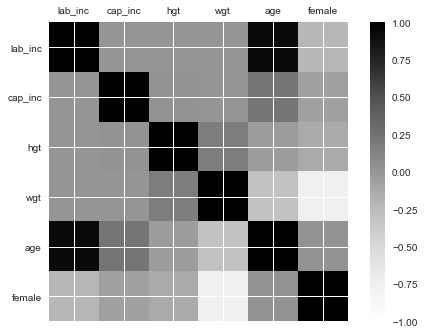

          lab_inc   cap_inc       hgt       wgt       age    female
lab_inc  1.000000  0.005325  0.002790  0.004507  0.924053 -0.215469
cap_inc  0.005325  1.000000  0.021572  0.006299  0.234159 -0.062569
hgt      0.002790  0.021572  1.000000  0.172103 -0.045083 -0.127416
wgt      0.004507  0.006299  0.172103  1.000000 -0.300288 -0.763821
age      0.924053  0.234159 -0.045083 -0.300288  1.000000  0.020059
female  -0.215469 -0.062569 -0.127416 -0.763821  0.020059  1.000000


In [11]:
# Correlation matrix

def corr_plot(df):
  
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
 
corr_plot((Best[['lab_inc', 'cap_inc', 'hgt', 'wgt', 'age', 'female']]))
corr=Best[['lab_inc', 'cap_inc', 'hgt', 'wgt', 'age', 'female']].corr()
print(corr)


### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [12]:
# Read in my third data set
Data= pd.read_csv('IncomeIntel.txt', header=None,names = ['grad_year','gre_qnt','salary_p4'])
Data.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


In [13]:
# Run regression model
X, y = sm.add_constant(Data['gre_qnt'], prepend=False), Data['salary_p4']
reg= sm.OLS(y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           3.43e-68
Time:                        09:44:59   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt      -25.7632      1.365    -18.875      0.0

The estimated regression model is :

\begin{equation}
\widehat{salary-p4_i} = 8.954*10^4 -25.7632 *\widehat{gre_(qnt_i)}
\end{equation}

where $\beta_0$=8.954e+04 and $\beta_1$=-25.7632   

The standard errors are 878.764 for $\beta_0$ and 1.365 for $\beta_1$. 

#### (b) Create a scatterplot of GRE score and graduation year. 

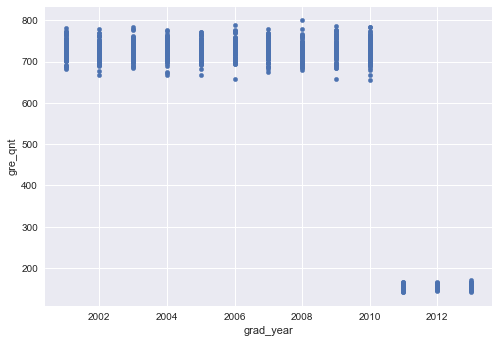

In [14]:
Data.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

The scoring scale for GRE quantitative part was changed to a 130-170 scale from the 200-800 scale in 2011. As a result, the values of scores since 2011 are much smaller than the ones before. This is a system drift (change in the system itself). If we don't recognize this issue, we'll probably overestimate the marginal effect of `gre_qnt` on predicting `salary_p4`. The hypothesis that the estimated coefficient $\beta_1$ is zero will likely not be accepted using this raw data. 

One solution is to normalize the `gre_qnt`using z-score with each year. The standard scores are not affected by different scales.

\begin{equation}
z_{i,j} = \frac{gre\_qnt_{i,j}-\mu_j}{\sigma_j}
\end{equation}

where i means different observations within j-th year.

In [29]:
Data['gre_qnt']=Data.groupby('grad_year').transform(lambda x: (x-x.mean())/x.std())['gre_qnt']

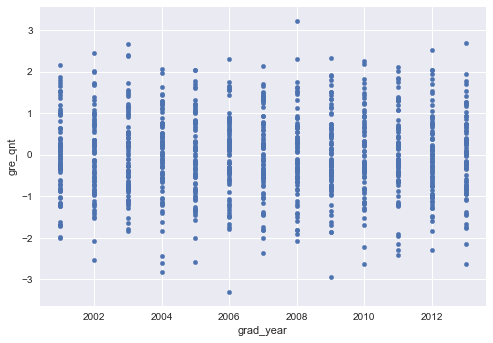

In [23]:
#Scatter plot with z-score of 'gre_qnt`
Data.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

#### (c) Create a scatterplot of income and graduation year

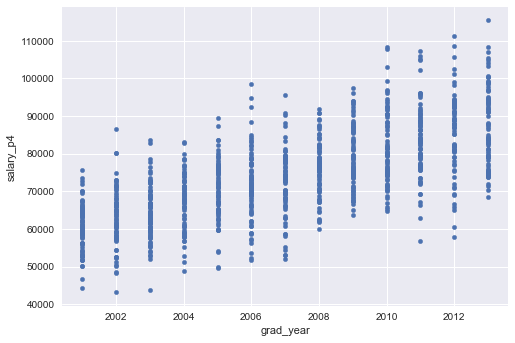

In [17]:
Data.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

Across different years, the means of income seem to be growing. Thus the `salary_p4` is not stationary. We need to de-trend this variable for the analysis. This could be done by calculating the average growth rate in salaries across all 13 years and dividing each salary by (1 + avg_growth_rate) ** (grad_year - 2001).

In [30]:
#Calculate the mean salary each year
avg_inc_by_year = Data['salary_p4'].groupby(Data['grad_year']).mean().values

#Calculate the average growth rate in salaries across all 13 years
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()
#avg_growth_rate=0.0308

#Divide each salary by (1 + avg_growth_rate) ** (grad_year - 2001)
Data['rate']=(1 + avg_growth_rate) ** (Data['grad_year']-2001)
Data['salary_p4_new']=Data['salary_p4']/Data['rate']

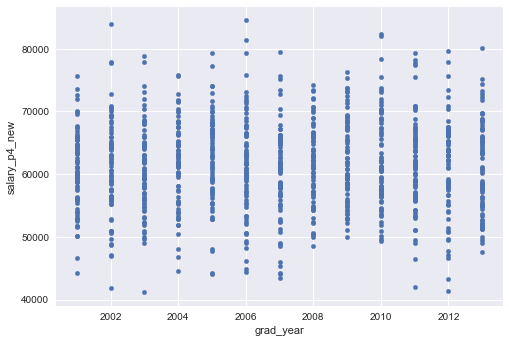

In [31]:
Data.plot(x='grad_year', y='salary_p4_new', kind='scatter')
plt.show()

#### (d) Re-estimate coefficients with updated variables.

In [27]:
# Code to re-estimate, output of new coefficients
X, y = sm.add_constant(Data['gre_qnt'], prepend=False),Data['salary_p4_new']
reg2= sm.OLS(y,X).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_p4_new   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4395
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.508
Time:                        09:45:35   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt     -150.6097    227.193     -0.663      0.5

The estimated coefficients are $\beta_0$ is 6.142e+04 and $\beta_1$ is  -150.6097. The standard error is 225.711 for $\beta_0$  and 227.193 for  $\beta_1$.

The new $\beta_0$ is a bit smaller to the previous one. But the new $\beta_1$ is much smaller. Also we notice that the estimate of old $\beta_1$ is statisically significant, while the new $\beta_1$ is not. If we ignore the stationarity and data drift problems, we might falsely reject the null hypothesis that higher intelligence is not associated with higher income. Now we cannot reject the null hypothesis. We might want to conclude that higher intelligence is not associated with higher income.

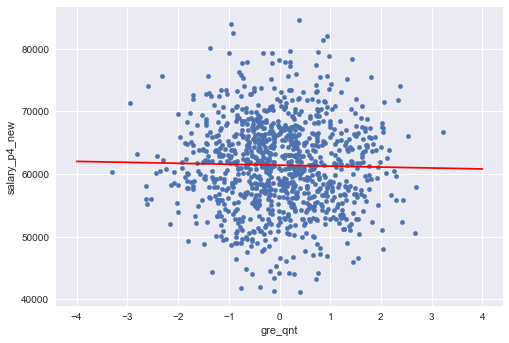

In [21]:
Data.plot(x='gre_qnt', y='salary_p4_new', kind='scatter')
x1=np.linspace(-4,4)
y1=-150.6097*x1+6.142e+04
plt.plot(x1,y1,'-r')
plt.show()

### 3. Assessment of Kossinets and Watts.

The research question of the paper is: What could explain the mechanism of homophily generation in a dynamic social network?


The authors merged three databases to cover interaction, affiliation, and attribute-type longitudinal data of 30,396 observations. These observations are undergraduate and graduate students, faculty, and staff in a large U.S. university, who were active email users in that academic year. In particular, the three datasets are:

(1) the logs of e-mail interactions within the university over one academic year; 

(2) a database of individual attributes (status, gender, age, department, number of years in the community, etc.);

(3) records of course registration, in which courses were recorded separately for each semester. 

The variables for the network modeling are personal characteristics (age, gender, home state, formal status, years in school), organizational affiliations (primary department, school, campus, dormitory, academic field), course-related variables (courses taken, courses taught), and e-mail-related variables (days active, messages sent, messages received, in-degree, out-degree, reciprocated degree).


After the data cleaning, the authors got 7,156,162 messages exchanged by 30,396 stable e-mail users during the 270 days period. Appendix A provides a description and definition of these variables.

One potential problem about the dataset is that only e-mail accounts on the central university server were included. The authors addressed the problem that department-specified email accounts such as such as "xyz@department.university.edu" cannot be matched with employee records and therefore have been deleted. Another fact is that many people might choose to use their oown email account such as "@gmail.com" for communciations with others for better functionalities. Although these records are much harder to obtain, excluding them from the analysis might make the social network of interest incomplete and biased.

Matching the email-logs and characteristics of the senders and receivers to construct "social relationship" is a challenge task. E-mail exchanges comprise discrete and intermittent “spike trains” that are often “bursty” in nature (Cortes et al. 2003; Eckmann, Moses, and Sergi 2004). One weekness is that it couldn't track the timing of the tie formation. To address this weekness, the authors introduced the sliding window filter model to construct instantaneous network approximations from discrete dyadic interactions. This technique often is employed to analyze and visualize networks over time (Cortes et al. 2003; Moody et al. 2005; Kossinets and Watts 2006)


